자치구, 법정동 별로 부동산 임대료 비교하기

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

import mysql.connector

conn = mysql.connector.connect(
    host = "database-1.cbwuowec22t2.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "team2",
    password = "1234",
    database = "eda_project"
)

query = """
    SELECT g.gu_name, d.dong_name, r.estate_type, r.estate_size, r.estate_rent, r.estate_deposit
    FROM gu g, real_estate r, dong d
    WHERE g.gu_id = r.gu_id AND d.dong_id = r.dong_id
"""


df = pd.read_sql(query, conn)

conn.close()

df


/tmp/ipykernel_15547/2826590175.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,gu_name,dong_name,estate_type,estate_size,estate_rent,estate_deposit
0,강남구,개포동,월세,63.4021,156.8270,35493.80
1,강남구,개포동,전세,65.4866,0.0000,73743.30
2,강남구,논현동,월세,43.3511,112.4050,10508.60
3,강남구,논현동,전세,54.7163,0.0000,46741.10
4,강남구,대치동,월세,61.4932,132.8380,32391.80
...,...,...,...,...,...,...
759,중랑구,상봉동,전세,46.9074,0.0000,26960.70
760,중랑구,신내동,월세,47.2308,44.2891,6466.25
761,중랑구,신내동,전세,67.5466,0.0000,31843.10
762,중랑구,중화동,월세,46.3803,50.1542,5656.78


구별 평균 월세 가격 시각화 (Bar Chart)

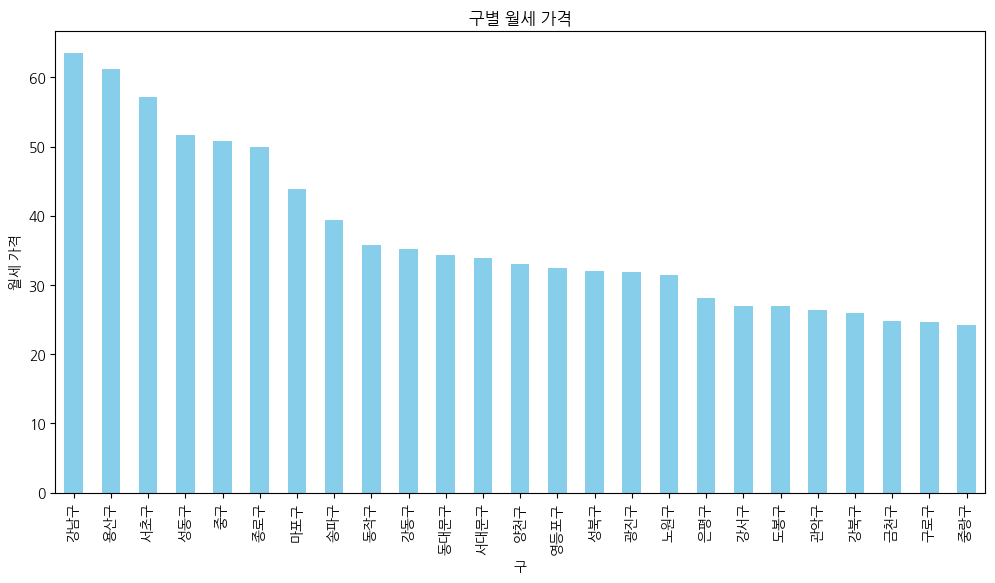

In [2]:

rent_by_gu = df.groupby('gu_name')['estate_rent'].mean().sort_values(ascending=False)

# Bar plot으로 시각화
plt.figure(figsize=(12, 6))
rent_by_gu.plot(kind='bar', color='skyblue')
plt.title('구별 월세 가격')
plt.xlabel('구')
plt.ylabel('월세 가격')
plt.xticks(rotation=90)
plt.show()


평균 월세 가격이 가장 낮은 중랑구의 법정동별 평균월세 가격

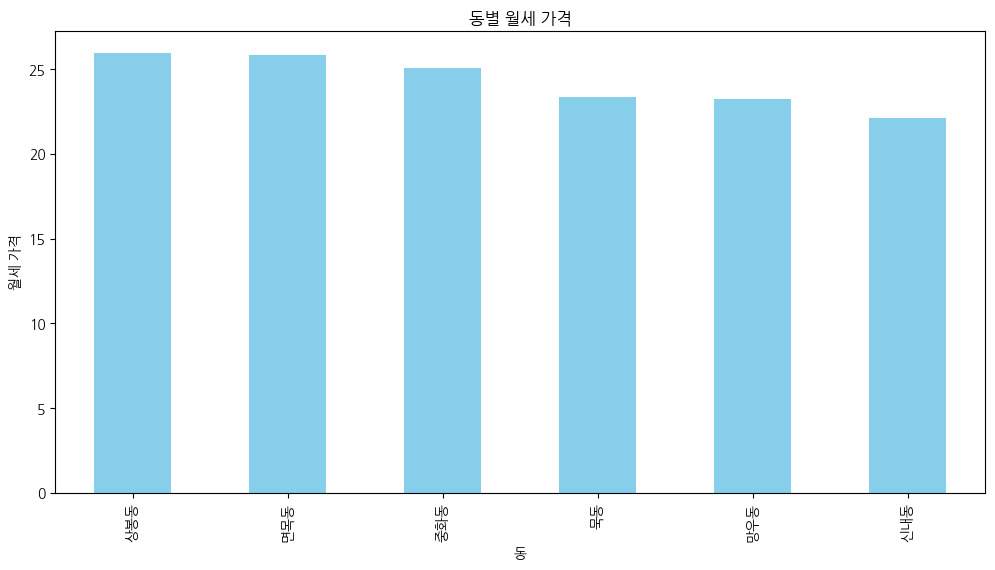

In [3]:
rent_by_dong = df[df['gu_name'] == '중랑구'].groupby('dong_name')['estate_rent'].mean().sort_values(ascending=False)


# Bar plot으로 시각화
plt.figure(figsize=(12, 6))
rent_by_dong.plot(kind='bar', color='skyblue')
plt.title('동별 월세 가격')
plt.xlabel('동')
plt.ylabel('월세 가격')
plt.xticks(rotation=90)
plt.show()


중랑구의 신내동의 월세가격이 가장 낮다!

동별로 면적 대비 월세가 가장 저렴한 순위 

In [6]:
df= df[df['estate_type'] == "월세"]

# 면적 대비 월세 계산 (면적 대비 월세 = 월세 / 면적)
df['면적대비_월세'] = df['estate_rent'] / df['estate_size']

# 면적 대비 월세 기준으로 오름차순으로 순위 매기기
df['rank'] = df['면적대비_월세'].rank(ascending=True, method='min')

# 동별로 순위 정렬
df_desc = df.sort_values(by='rank')

df_desc[['gu_name','dong_name', '면적대비_월세', 'rank']]

,gu_name,dong_name,면적대비_월세,rank
516,용산구,용산동3가,0.365789,1.0
110,구로구,천왕동,0.551027,2.0
685,중구,남산동1가,0.572316,3.0
749,중구,회현동3가,0.601413,4.0
399,송파구,마천동,0.694995,5.0
...,...,...,...,...
547,용산구,한남동,4.319329,386.0
635,종로구,운니동,4.331683,387.0
727,중구,정동,4.382566,388.0
582,종로구,관수동,4.710595,389.0
